In [1]:
# ===========================
# Install Qiskit, Aer and pylatexenc
# ===========================
!pip install qiskit --quiet
!pip install qiskit-aer --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 77.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 39.1 MB/s eta 0:00:00


In [2]:
# ==========================================
# HADAMARD GATE VISUALIZATION & ANALYSIS
# Compatible with Qiskit 2.x
# ==========================================

# -------------------------
# 1️⃣ Imports
# -------------------------
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_state_city, plot_histogram
from qiskit_aer import AerSimulator
import numpy as np

--- |0> ---
Statevector: [0.707107+0.j 0.707107+0.j]


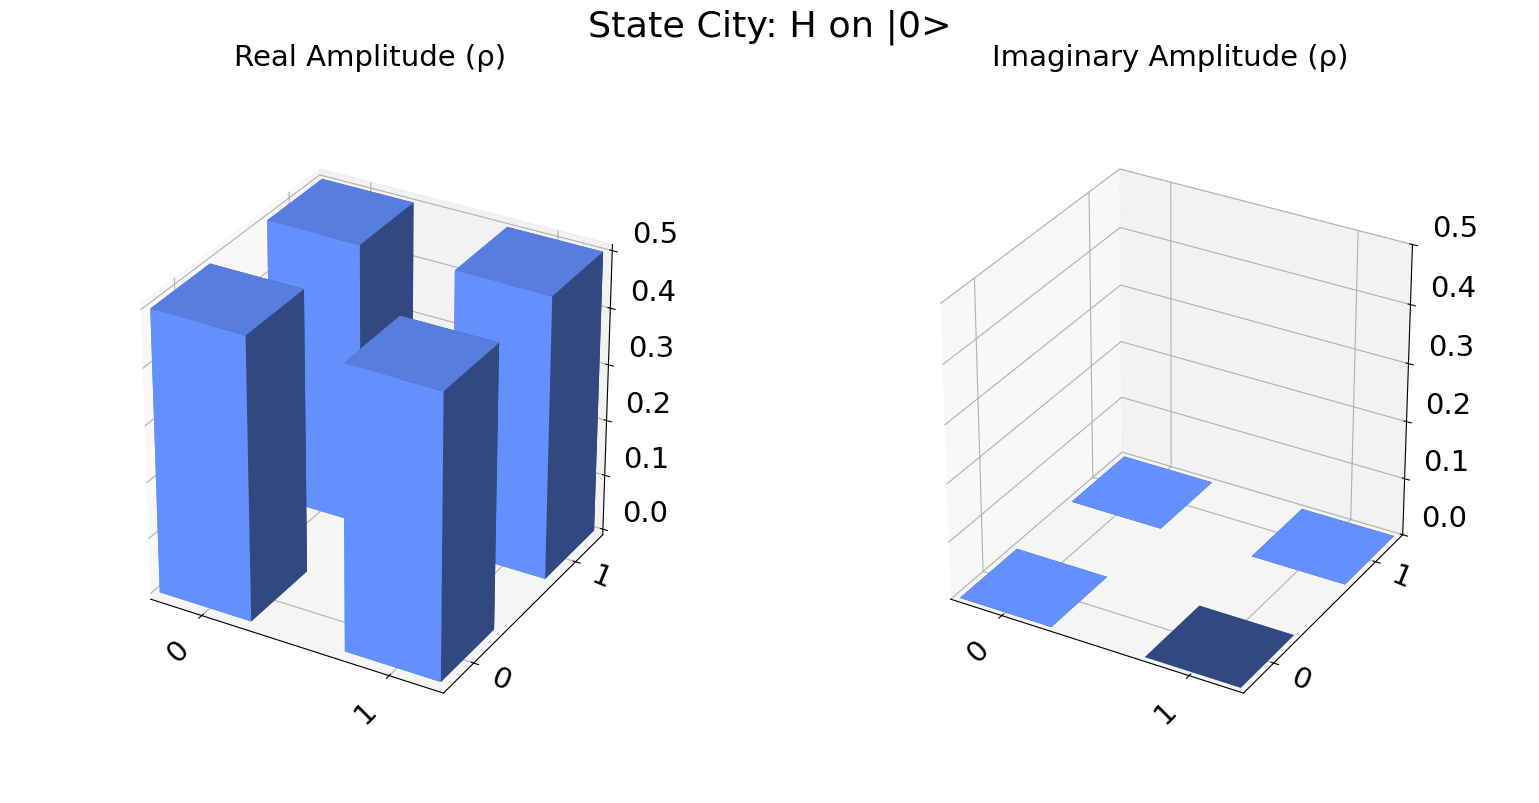

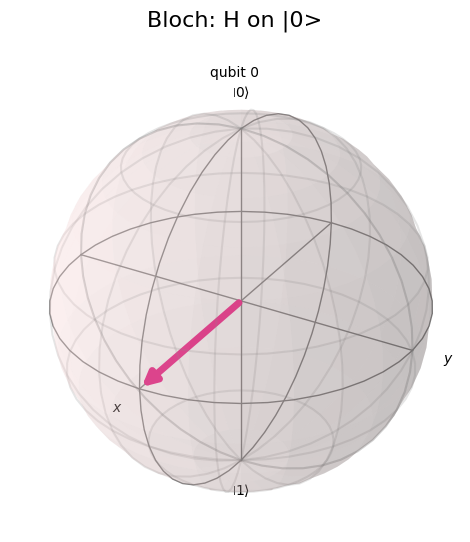


--- |1> ---
Statevector: [ 0.707107+0.j -0.707107+0.j]


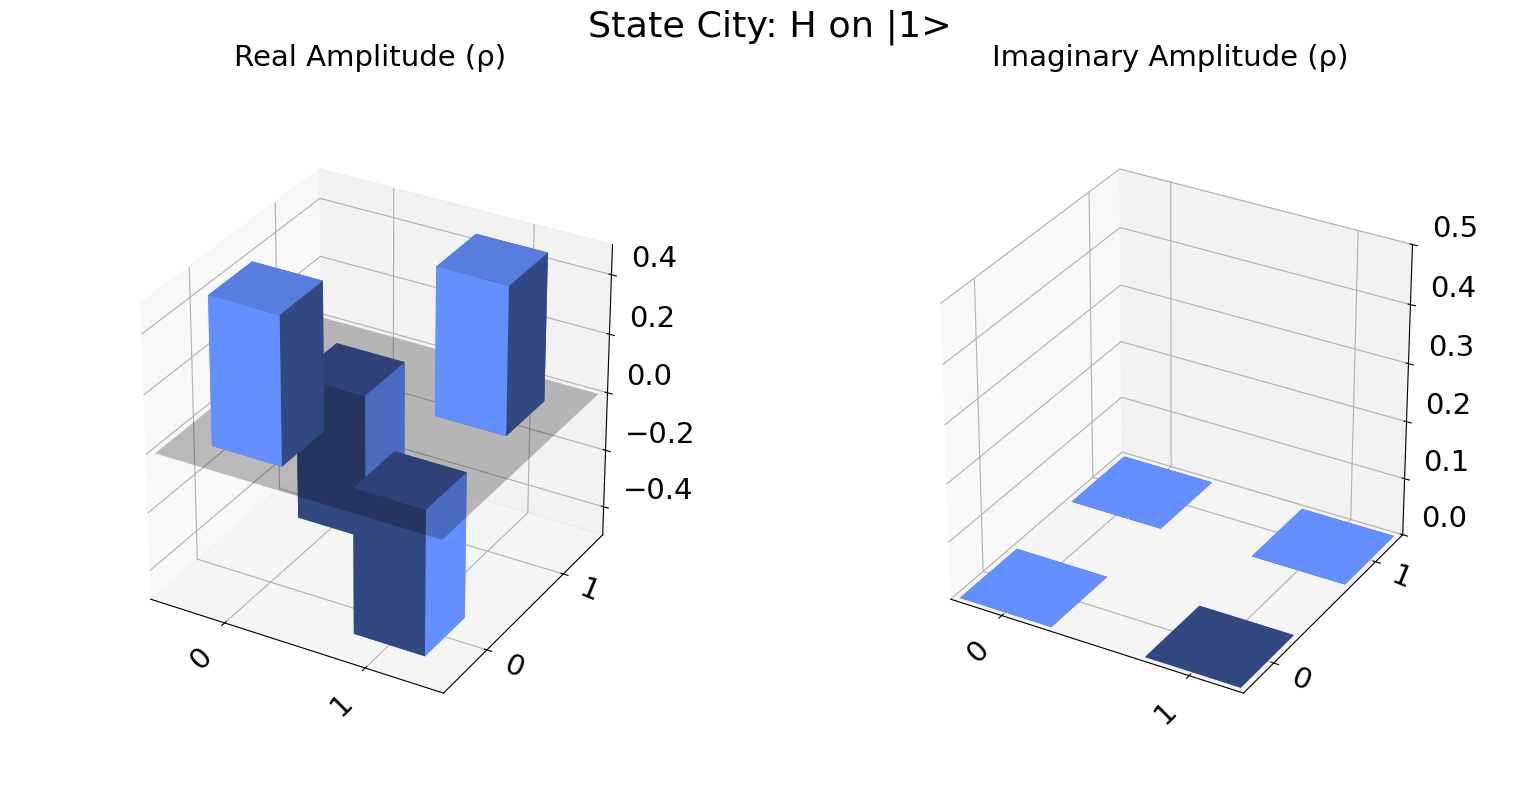

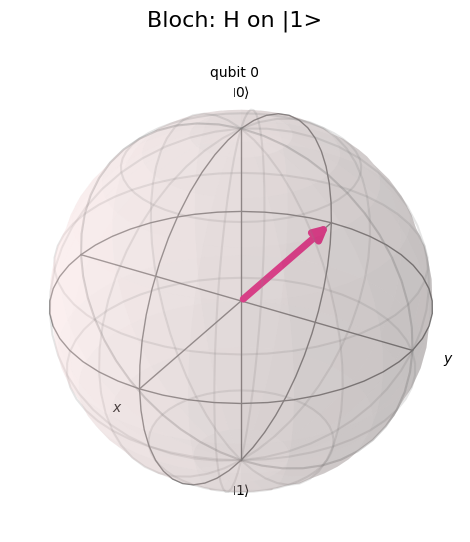


--- |+> ---
Statevector: [1.+0.j 0.+0.j]


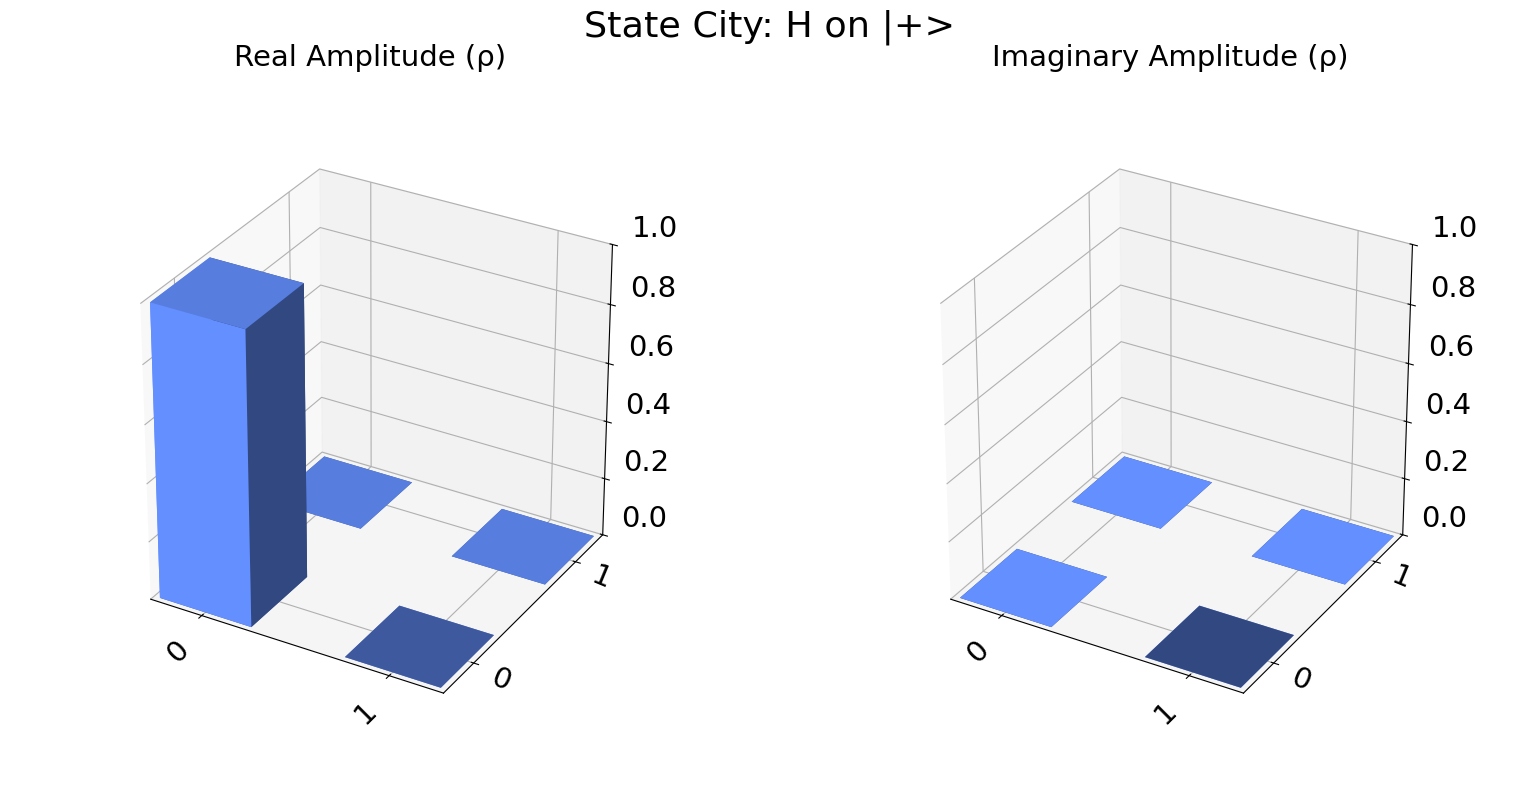

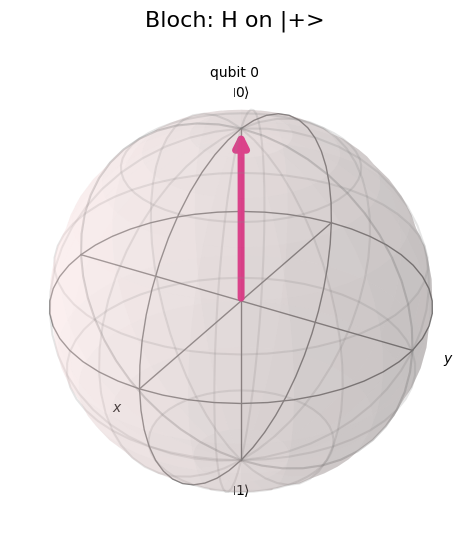


--- |-> ---
Statevector: [0.+0.j 1.+0.j]


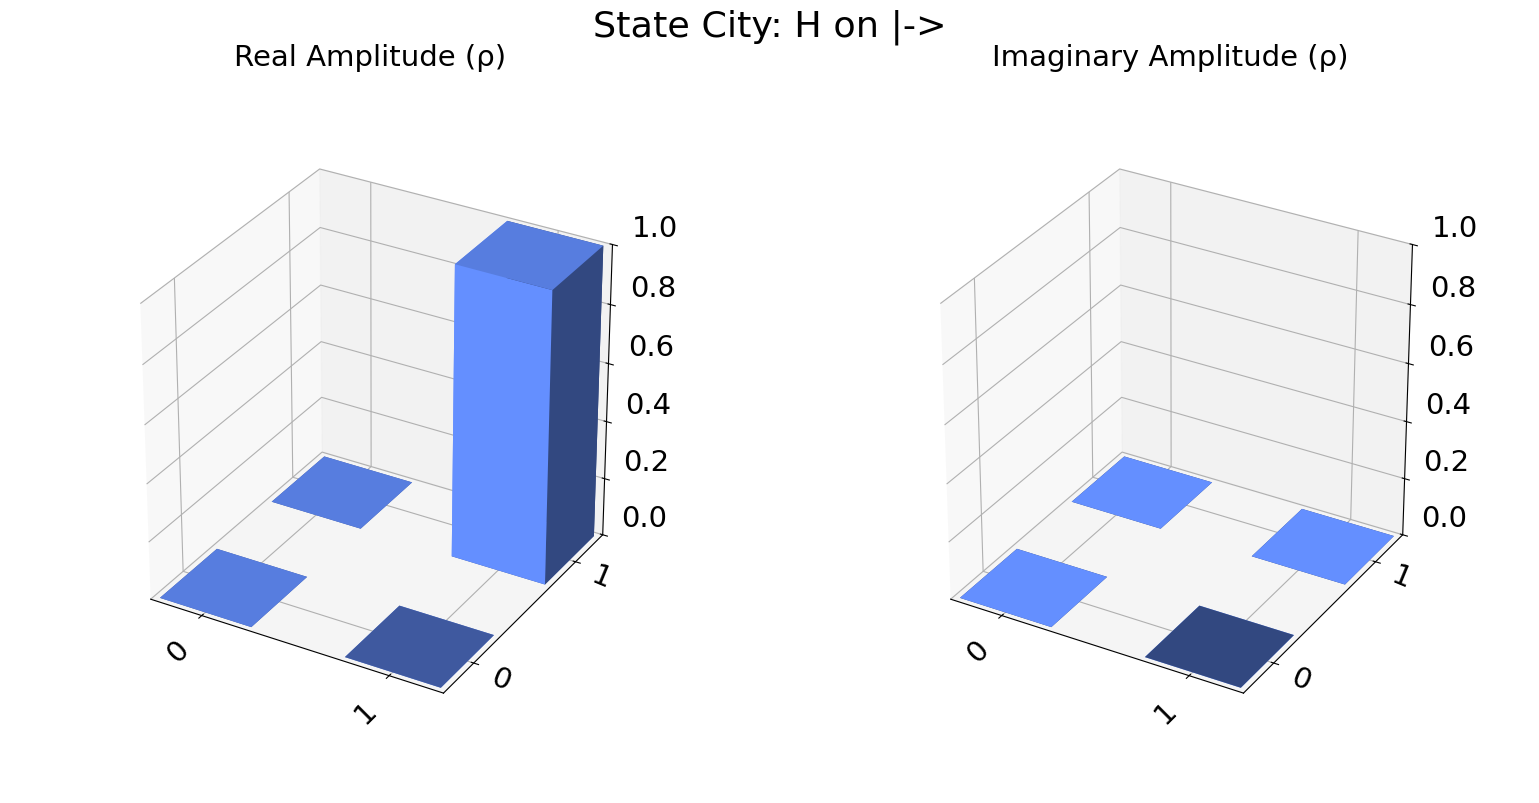

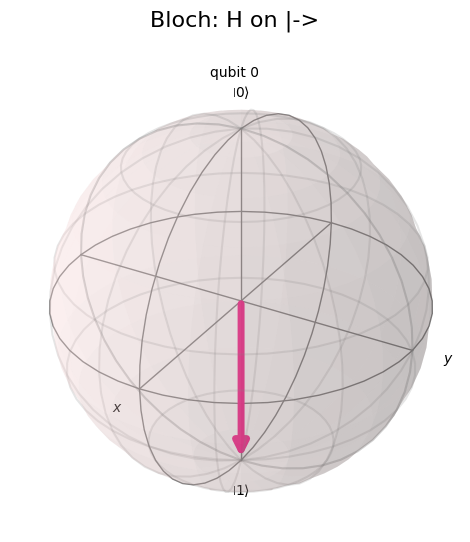

In [12]:
# Task 1: H on |0>, |1>, |+>, |-> (statevectors + Bloch + city plots)
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_state_city
from IPython.display import display
import numpy as np

def single_qubit_show(init_vec, label):
    qc = QuantumCircuit(1)
    qc.initialize(init_vec, 0)
    qc.h(0)
    sv = Statevector.from_instruction(qc)
    print(f"--- {label} ---")
    print("Statevector:", np.round(sv.data, 6))
    display(plot_state_city(sv, title=f"State City: H on {label}"))
    display(plot_bloch_multivector(sv, title=f"Bloch: H on {label}"))
    print()

# Define basis / superposition states
ket0 = [1, 0]
ket1 = [0, 1]
ket_plus = [1/np.sqrt(2), 1/np.sqrt(2)]
ket_minus = [1/np.sqrt(2), -1/np.sqrt(2)]

single_qubit_show(ket0, "|0>")
single_qubit_show(ket1, "|1>")
single_qubit_show(ket_plus, "|+>")
single_qubit_show(ket_minus, "|->")


--- H⊗H⊗H on |000> ---
Amplitudes (rounded): [0.353553+0.j 0.353553+0.j 0.353553+0.j 0.353553+0.j 0.353553+0.j
 0.353553+0.j 0.353553+0.j 0.353553+0.j]


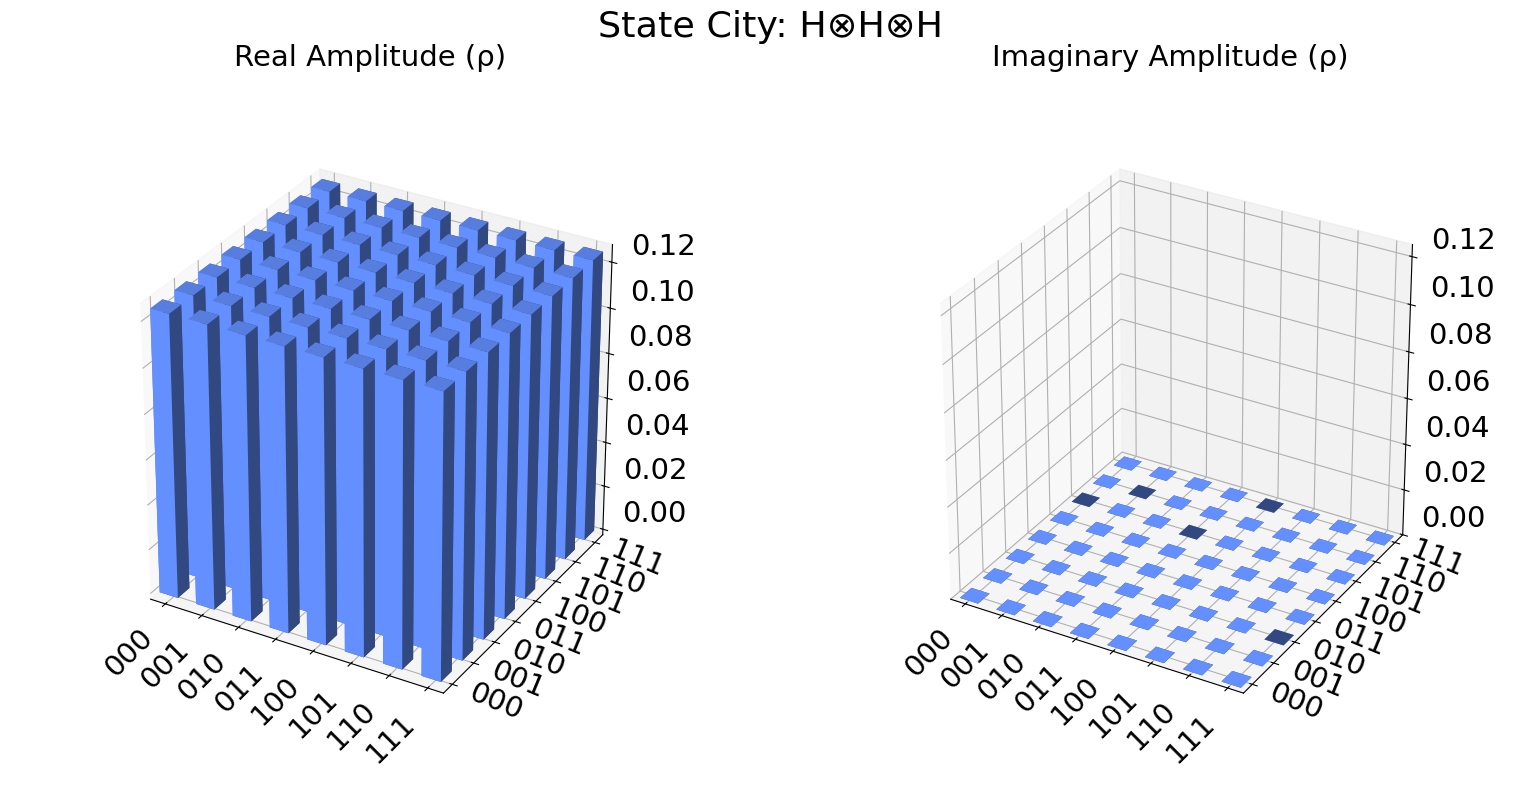

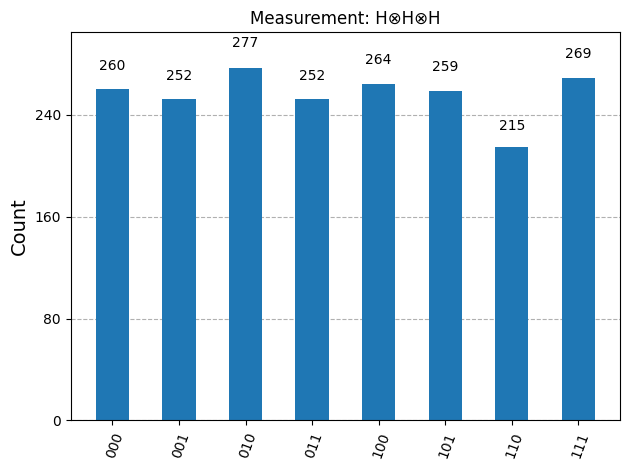

Counts (sample): {'110': 215, '101': 259, '000': 260, '010': 277, '011': 252, '111': 269, '100': 264, '001': 252}
Expected probability per basis state ≈ 1/8 ≈ 0.125


In [13]:
# Task 2: 3-qubit H⊗H⊗H (statevector + measurement histogram)
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_city, plot_histogram
from qiskit_aer import AerSimulator
from IPython.display import display
import numpy as np

sim = AerSimulator()

# Statevector / visualization (no measurement)
qc3 = QuantumCircuit(3)
qc3.h([0,1,2])
sv3 = Statevector.from_instruction(qc3)
print("--- H⊗H⊗H on |000> ---")
print("Amplitudes (rounded):", np.round(sv3.data, 6))
display(plot_state_city(sv3, title="State City: H⊗H⊗H"))

# Measurement simulation (histogram)
qc3m = QuantumCircuit(3,3)
qc3m.h([0,1,2])
qc3m.measure([0,1,2],[0,1,2])
tqc = transpile(qc3m, sim)
res = sim.run(tqc, shots=2048).result()
counts = res.get_counts()
display(plot_histogram(counts, title="Measurement: H⊗H⊗H"))
print("Counts (sample):", counts)
print("Expected probability per basis state ≈ 1/8 ≈ 0.125")


--- GHZ-like state (H(0); CX(0,1); CX(0,2)) ---
Statevector (rounded): [0.707107+0.j 0.      +0.j 0.      +0.j 0.      +0.j 0.      +0.j
 0.      +0.j 0.      +0.j 0.707107+0.j]


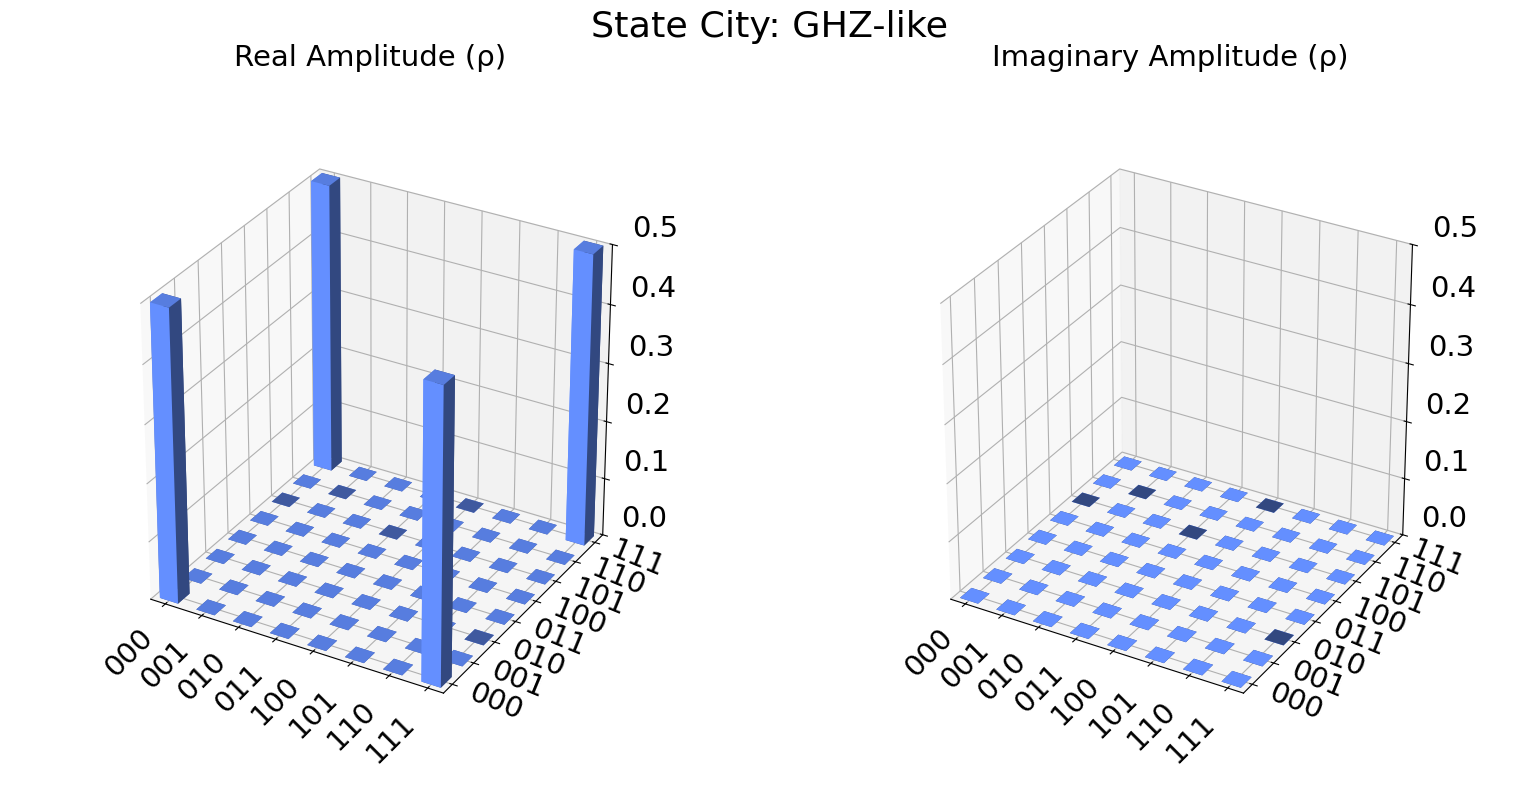

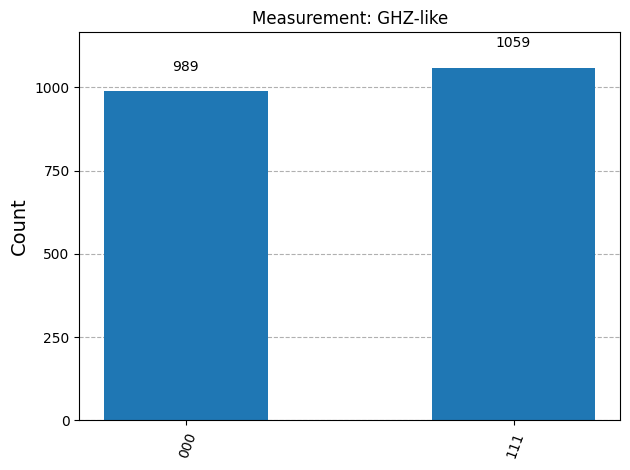

Counts (sample): {'111': 1059, '000': 989}
Only '000' and '111' should appear (roughly 50% each).


In [14]:
# Task 3: Create GHZ-like state with H + CX + CX, show statevector + measurement
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_city, plot_histogram
from qiskit_aer import AerSimulator
from IPython.display import display
import numpy as np

sim = AerSimulator()

qc_ghz = QuantumCircuit(3)
qc_ghz.h(0)
qc_ghz.cx(0,1)
qc_ghz.cx(0,2)
sv_ghz = Statevector.from_instruction(qc_ghz)
print("--- GHZ-like state (H(0); CX(0,1); CX(0,2)) ---")
print("Statevector (rounded):", np.round(sv_ghz.data, 6))
display(plot_state_city(sv_ghz, title="State City: GHZ-like"))

# Measurement
qc_ghzm = QuantumCircuit(3,3)
qc_ghzm.h(0)
qc_ghzm.cx(0,1)
qc_ghzm.cx(0,2)
qc_ghzm.measure([0,1,2],[0,1,2])
tqc = transpile(qc_ghzm, sim)
res = sim.run(tqc, shots=2048).result()
counts = res.get_counts()
display(plot_histogram(counts, title="Measurement: GHZ-like"))
print("Counts (sample):", counts)
print("Only '000' and '111' should appear (roughly 50% each).")


--- H twice on |1> ---
Statevector: [0.+0.j 1.+0.j]


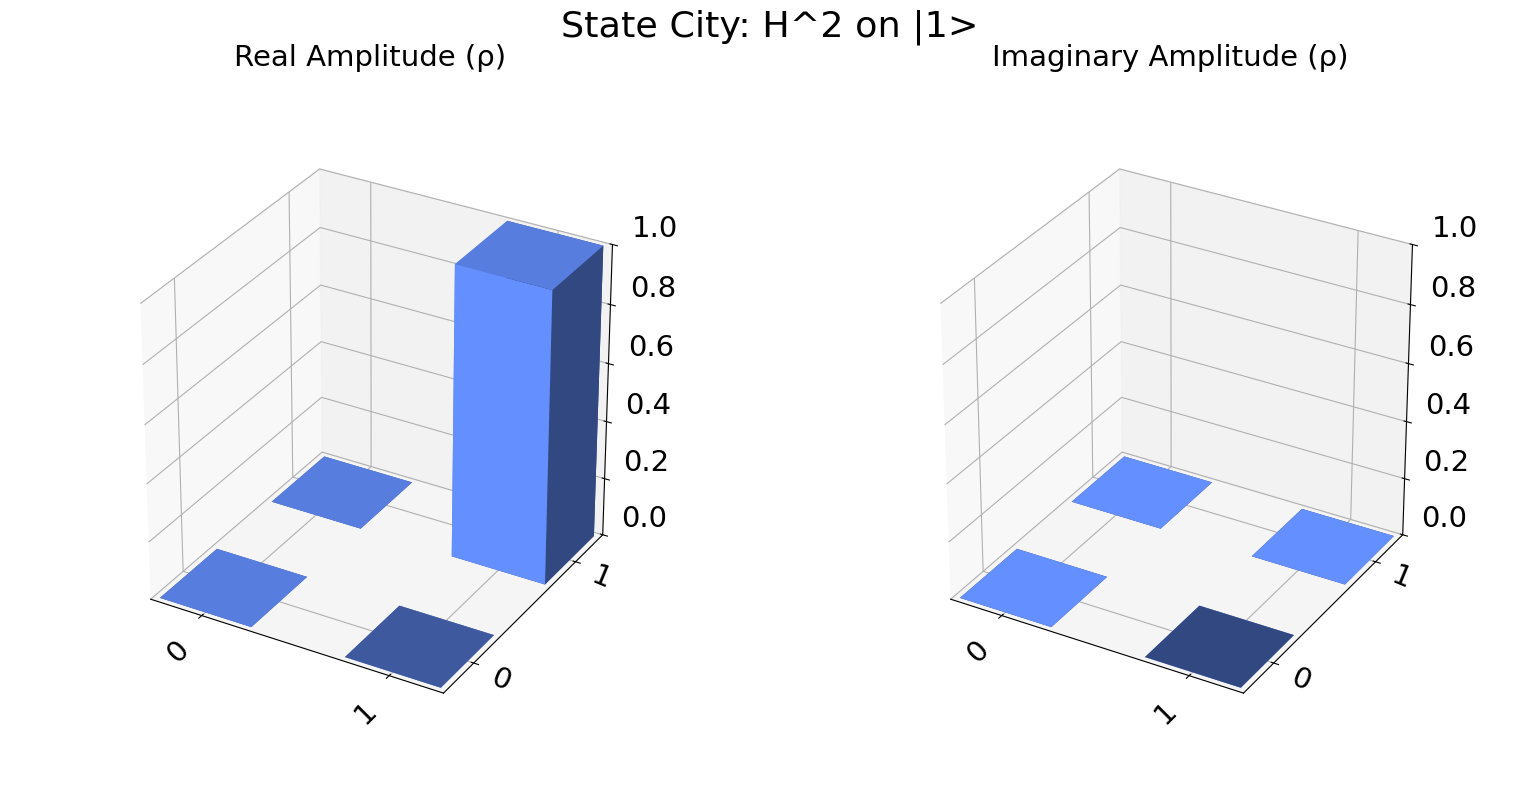

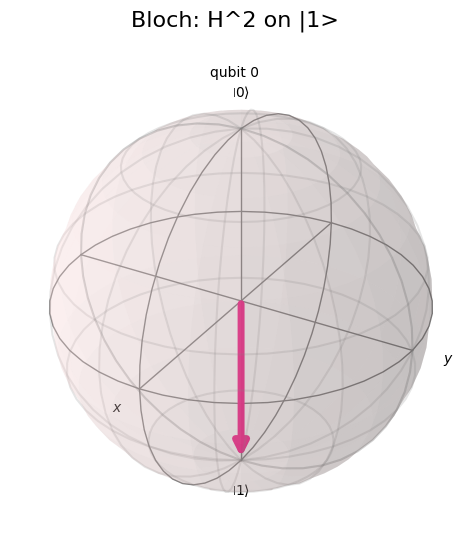

In [15]:
# Task 4: Apply H twice on |1> and verify
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_state_city
from IPython.display import display
import numpy as np

qc = QuantumCircuit(1)
qc.initialize([0,1], 0)  # start in |1>
qc.h(0)
qc.h(0)
sv = Statevector.from_instruction(qc)
print("--- H twice on |1> ---")
print("Statevector:", np.round(sv.data, 6))   # should print [0,1]
display(plot_state_city(sv, title="State City: H^2 on |1>"))
display(plot_bloch_multivector(sv, title="Bloch: H^2 on |1>"))


--- |0> ---


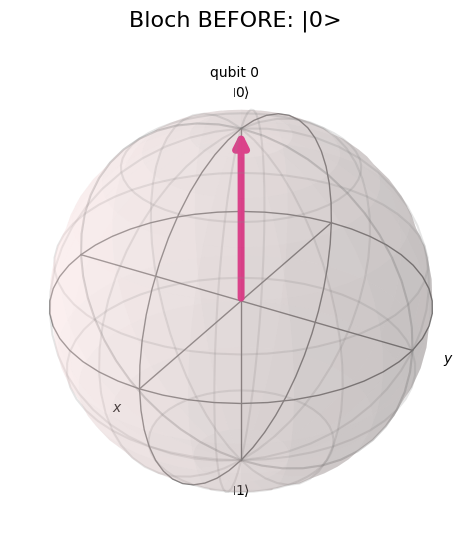

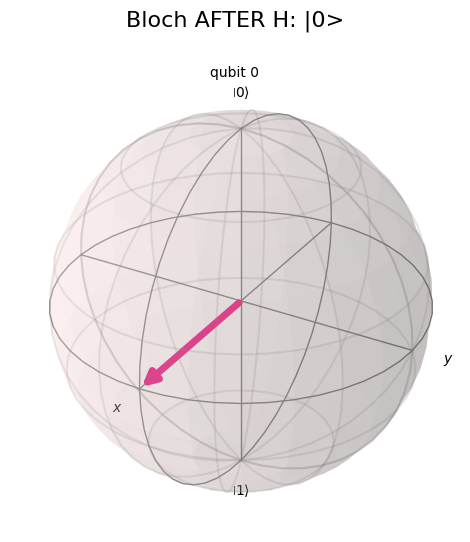


--- |1> ---


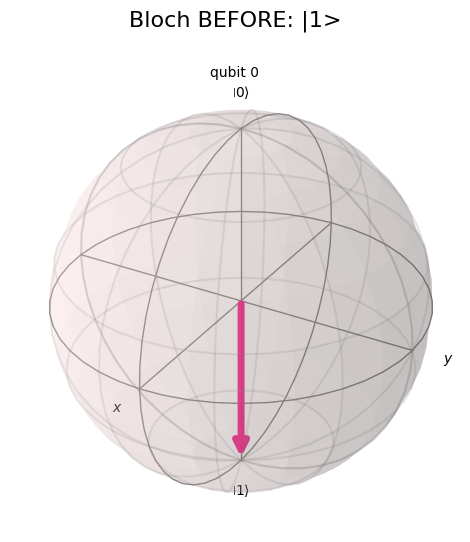

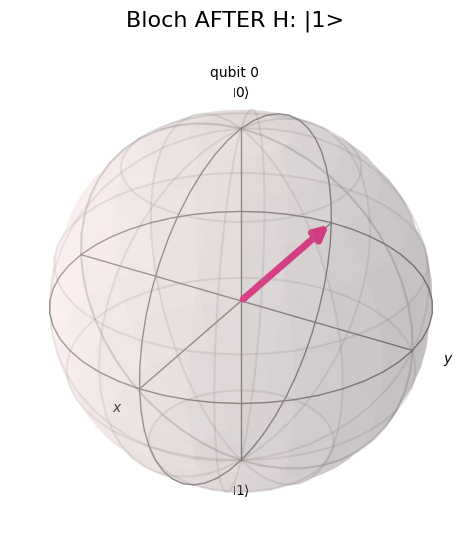


--- |+> ---


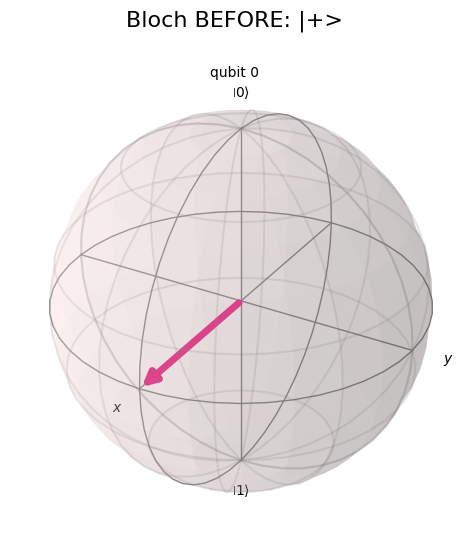

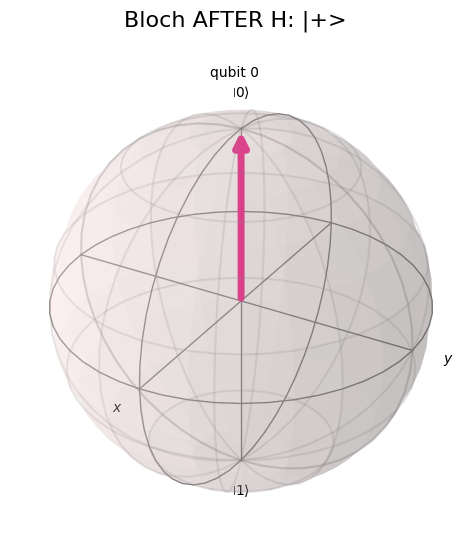


--- |-> ---


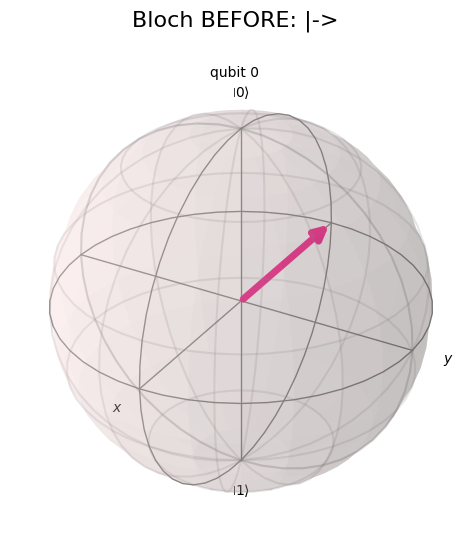

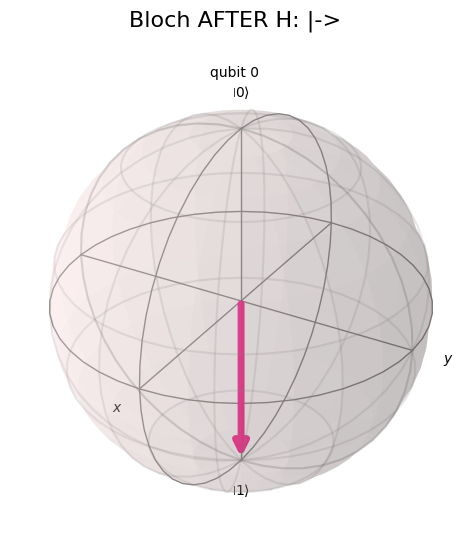

In [16]:
# Task 5: Bloch-sphere observation for the four states (|0>,|1>,|+>,|->) before and after H
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
from IPython.display import display
import numpy as np

def show_bloch_before_after(init_vec, label):
    # before
    qc_before = QuantumCircuit(1)
    qc_before.initialize(init_vec, 0)
    sv_before = Statevector.from_instruction(qc_before)
    # after H
    qc_after = QuantumCircuit(1)
    qc_after.initialize(init_vec, 0)
    qc_after.h(0)
    sv_after = Statevector.from_instruction(qc_after)
    print(f"--- {label} ---")
    display(plot_bloch_multivector(sv_before, title=f"Bloch BEFORE: {label}"))
    display(plot_bloch_multivector(sv_after, title=f"Bloch AFTER H: {label}"))
    print()

ket0 = [1,0]
ket1 = [0,1]
ket_plus = [1/np.sqrt(2), 1/np.sqrt(2)]
ket_minus = [1/np.sqrt(2), -1/np.sqrt(2)]

show_bloch_before_after(ket0, "|0>")
show_bloch_before_after(ket1, "|1>")
show_bloch_before_after(ket_plus, "|+>")
show_bloch_before_after(ket_minus, "|->")
